# Ejercicios de ilustración método de transformada inversa y aceptación y rechazo

In [1]:
# Importamos librerías a trabajar en todas las simulaciones
import matplotlib.pyplot as plt
import numpy as np
from itertools import cycle  # Librería para hacer ciclos
import scipy.stats as st     # Librería estadística
from math import factorial as fac # Importo la operación factorial

%matplotlib inline

### Ilustración método de la transformada inversa con paquete `stats`

In [8]:
st.triang




TypeError: 'a' is an invalid keyword argument for print()

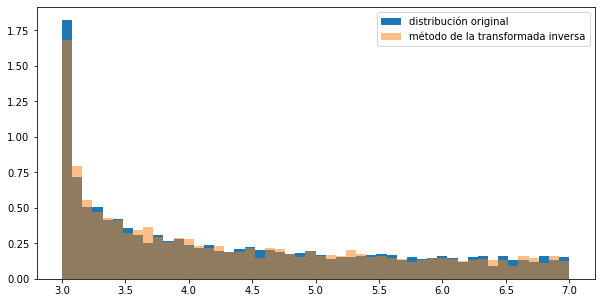

In [15]:
# Elegir la distribución
name_dist = 'beta'
# Explorar la función de la función getattr
dist = getattr(st, name_dist)
# Parametros de la distribución (tupla)
params = (0.5, 1)
# Cantidad de términos
N = 5000
# Diccionario de argumentos de la distribución
args = {'loc': 3, 'scale': 4}

# Generación de variable aleatorias de la distrubición elegida
x = dist(*params, **args).rvs(size=N)

# Comparación de histogramas
# 1. Histograma distribución original
plt.figure(figsize=[10,5])
plt.hist(x, bins=50, density=True, label='distribución original');

# 2. Implementación del método de la transformada inversa usando función 'ppf'
U = np.random.rand(N)
f_inv = dist(*params, **args).ppf(U)
plt.hist(f_inv, bins=50, density=True, alpha=0.5, label='método de la transformada inversa');
plt.legend()

## <font color ='red'> **Ejercicio 2** 
 1. Generación variable aleatoria continua

$$
h(x)=
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
2-x, & 1\le x \le 2 \\
0,& x>2
\end{cases}
$$

Genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 100 muestras generadas con el método y compárela con el función $h(x)$ dada, esto con el fín de validar que el procedimiento fue realizado de manera correcta

### Método de la transformada inversa

In [ ]:
h = lambda x: 0 if x<0 else (x if 0<=x<1 else (2 - x) if 1<=x<=2 else 0)

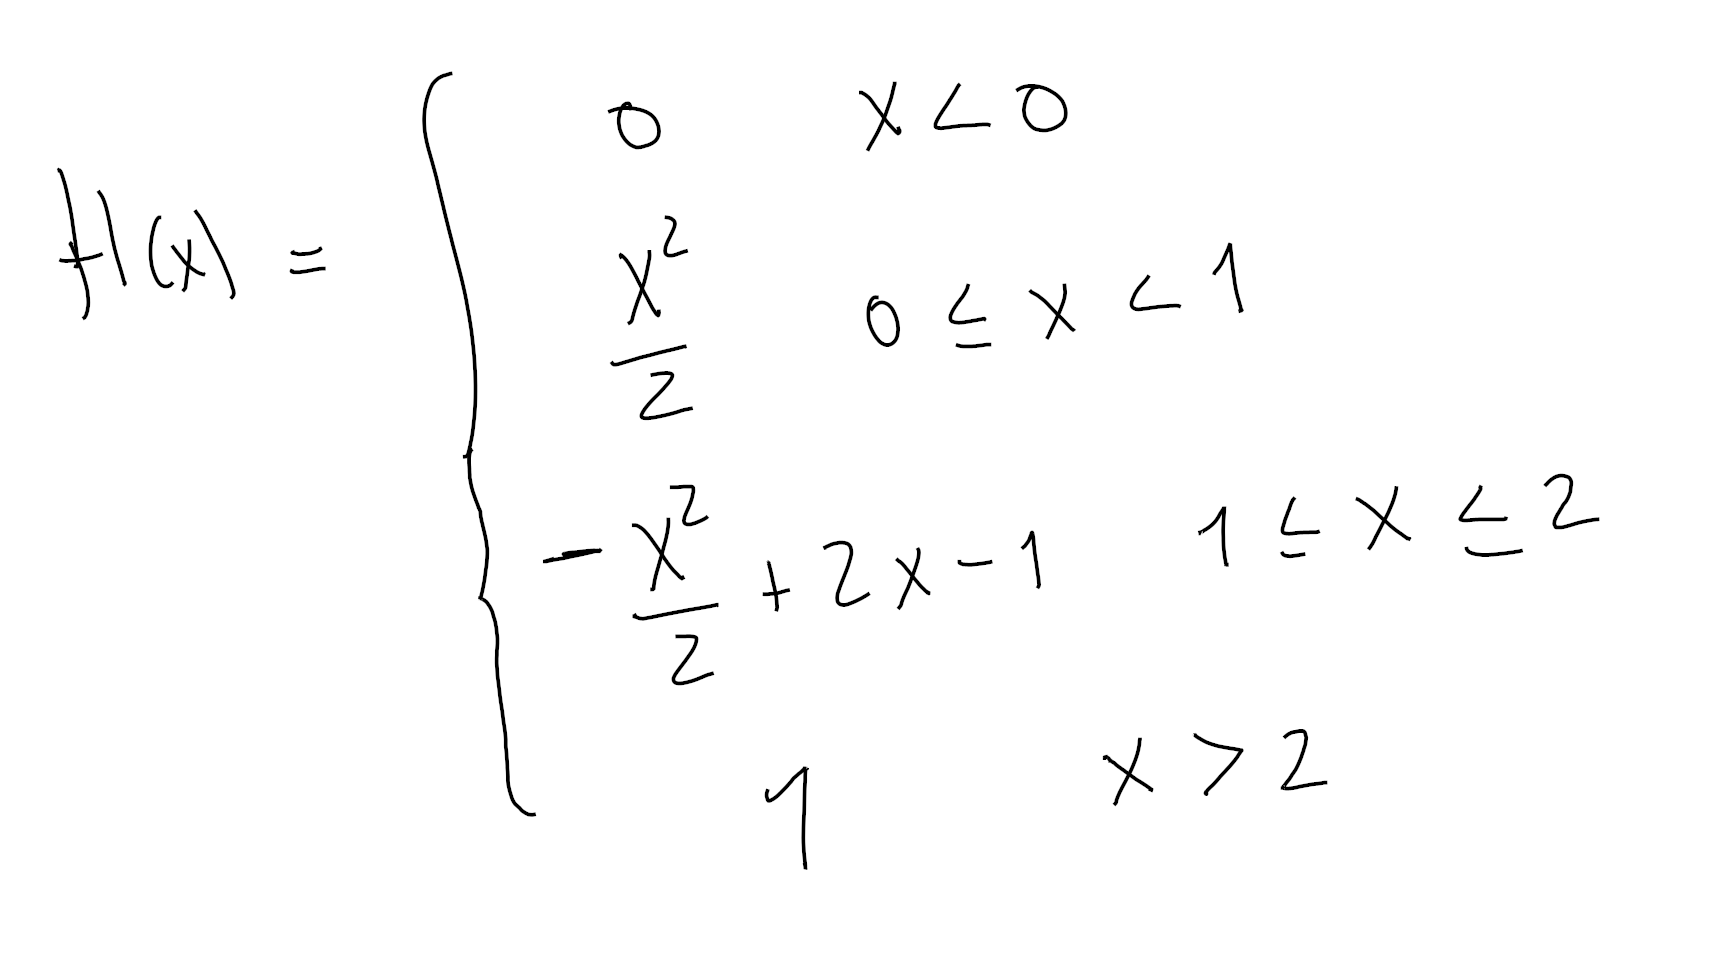

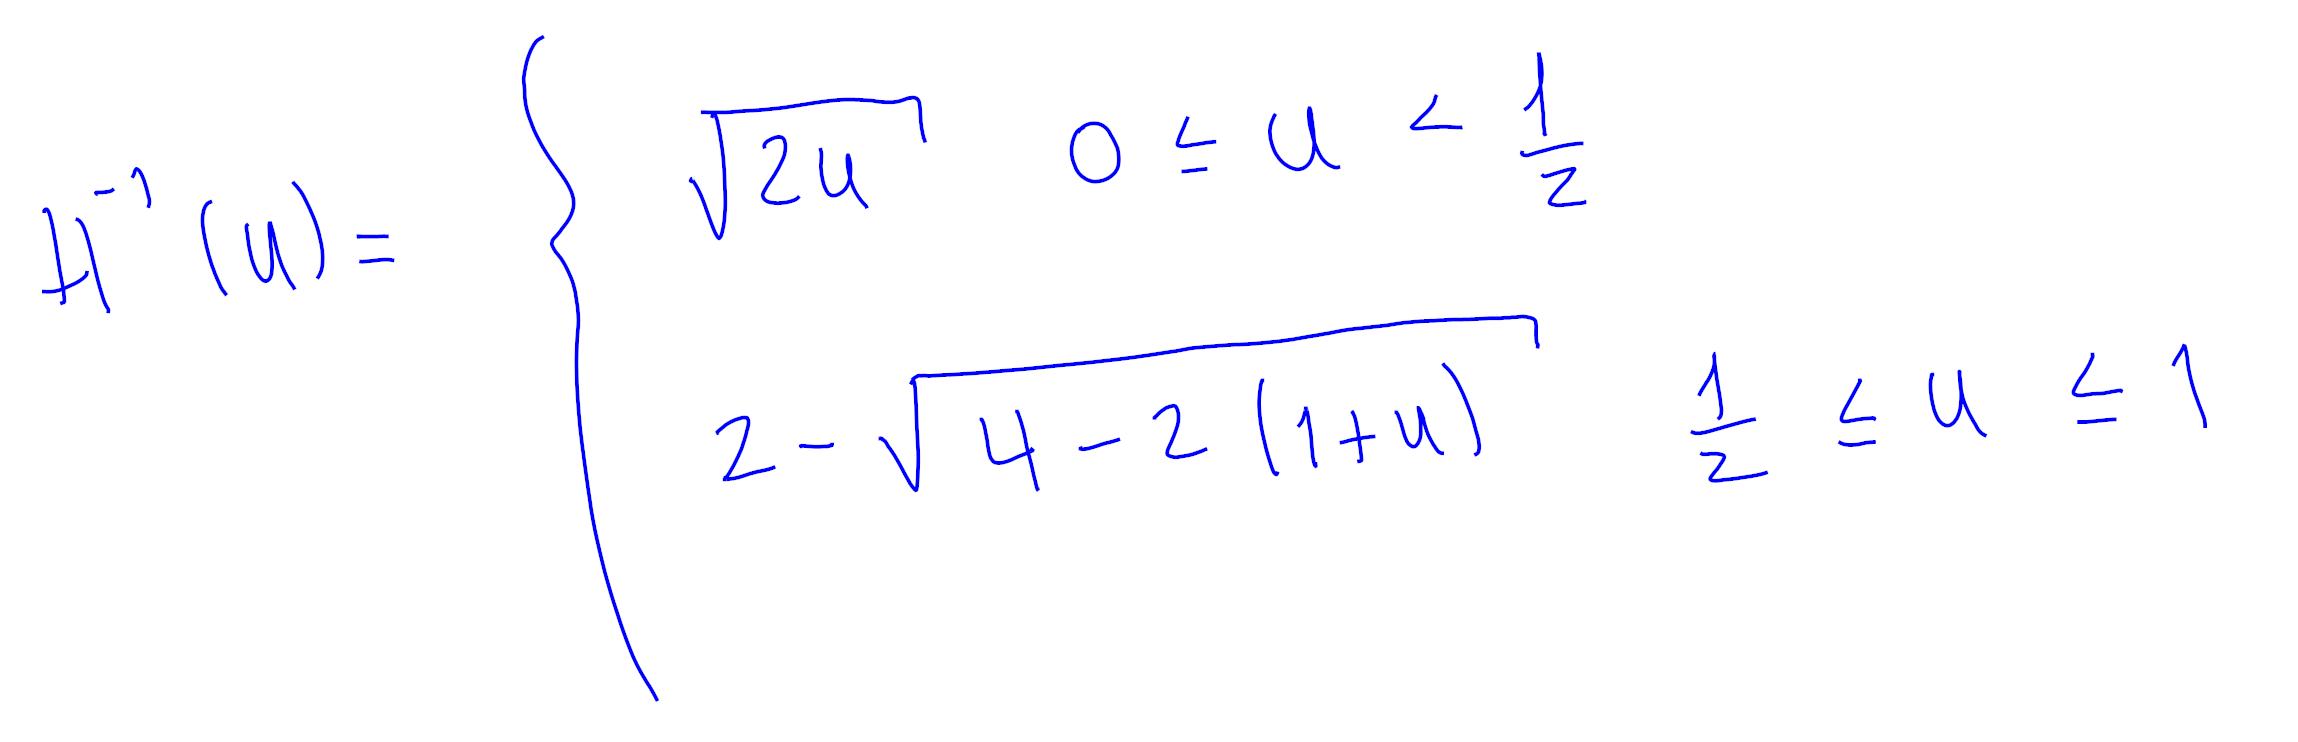

(array([0.10751699, 0.1535957 , 0.21503398, 0.21503398, 0.38398924,
        0.36862967, 0.49150623, 0.62974236, 0.56830408, 0.67582107,
        0.82941677, 0.6604615 , 0.79869763, 1.0137316 , 0.92157418,
        0.87549547, 0.98301246, 0.69118064, 0.6604615 , 0.64510193,
        0.58366365, 0.6604615 , 0.52222537, 0.38398924, 0.44542752,
        0.3532701 , 0.16895527, 0.18431484, 0.12287656, 0.04607871]),
 array([0.03717401, 0.10228   , 0.16738599, 0.23249198, 0.29759797,
        0.36270396, 0.42780995, 0.49291594, 0.55802193, 0.62312792,
        0.68823391, 0.7533399 , 0.81844589, 0.88355188, 0.94865787,
        1.01376386, 1.07886985, 1.14397584, 1.20908183, 1.27418782,
        1.33929381, 1.4043998 , 1.46950579, 1.53461179, 1.59971778,
        1.66482377, 1.72992976, 1.79503575, 1.86014174, 1.92524773,
        1.99035372]),
 <BarContainer object of 30 artists>)

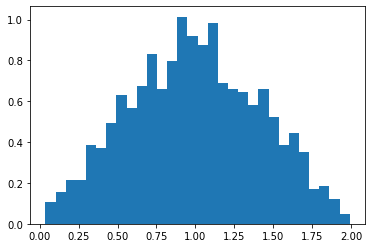

In [22]:
H_inv = lambda u: np.sqrt(2*u) if 0<=u<0.5 else 2-np.sqrt(4-2*(1+u))

u = np.random.rand(1000)

plt.hist(list(map(lambda u: H_inv(u), u)), bins=30, density=True)

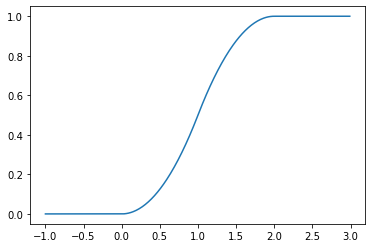

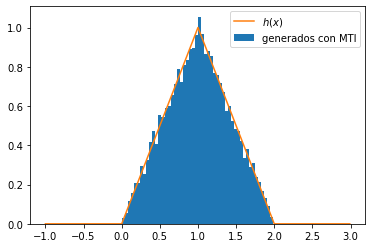

In [24]:
# Crear función acumulada
H = lambda x: 0 if x<0 else (x**2 / 2 if 0<=x<1 else (-x**2 / 2 + 2 * x - 1 if 1<=x<=2 else 1))
# Graficar función acumulada

# Crear función inversa
x = np.arange(-1, 3, 0.01)
plt.plot(x, list(map(lambda y: H(y), x)))
plt.show()

# Validar función inversa (gráfica)
H_inv = lambda u: np.sqrt(2*u) if 0<=u<0.5 else 2-np.sqrt(4-2*(1+u))

# Vector de aleatorios uniformes
u = np.random.rand(10000)

# Vector generado con MTI
x_rnd = list(map(lambda u: H_inv(u), u))

# Graficar histograma aleatorios
plt.hist(x_rnd, bins=50, density=True, label='generados con MTI')

# Función de densidad h(x)
h = lambda x: 0 if x < 0 else (x if 0 <= x < 1 else (2 - x if 1 <= x < 2 else 0))

density = list(map(lambda x: h(x), x))
# Graficar función de densidad h(x)
plt.plot(x, density, label='$h(x)$')
plt.legend();
plt.show()

### Método de aceptación y rechazo

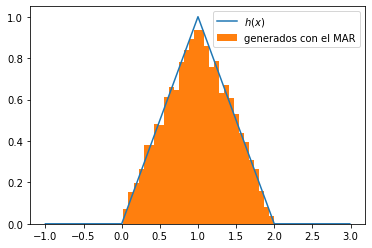

In [29]:
N = 10000

# Graficar densidad de probabilidad h(x)
density = list(map(lambda x: h(x), x))
plt.plot(x, density, label='$h(x)$')
plt.legend();

max_h = 1
# Programar método de aceptación y rechazo
t = lambda x: max_h * np.ones(N)

R1 = np.random.uniform(0, 2, N)
R2 = np.random.rand(N)

t_R1 = t(R1)
f_R1 = list(map(lambda x: h(x), R1))

condition = f_R1 >= R2 * t_R1

# Graficar puntos aceptados
x_mar = [R1[i] for i in range(N) if condition[i]]
# Almacenar números aceptados en una variable y graficar su histograma
plt.hist(x_mar, bins=30, density=True, label='generados con el MAR')
plt.legend()
plt.show()

In [31]:
len(x_mar)

4992

## Ejercicio 3
Suponga que tiene la siguiente probability mass function 
$$
P(X=k) = 
\begin{cases} 
\frac{1}{3}\left( \frac{2}{3}\right)^{k-1}, & \text{si } k=1, 2, \cdots \\
0, & \text{otro caso}
\end{cases}
$$

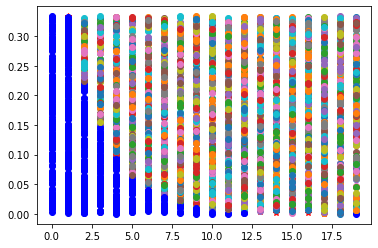

In [34]:
N = 4000
# PMF p(x)
p = lambda k: (1 / 3) * (2 / 3) ** (k-1) 

# Gráfica de pmf
k = np.arange(1, 20)
plt.plot(k, p(k), 'r*')

# Método de aceptación rechazo discreto
max_p = p(1)
t = lambda x: max_p * np.ones(N)

R1 = np.random.randint(0, 20, N)
R2 = np.random.rand(N)

t_R1 = t(R1)
f_R1 = p(R1)
condition = f_R1 >= R2 * t_R1

[plt.plot(R1[i], R2[i] * t_R1[i], 'bo') if condition[i] else plt.plot(R1[i], R2[i] * t_R1[i], 'o') 
        for i in range(N)];